Форма X: (100, 4)
Форма y: (100,)
Точность (Gradient Descent): 94.00%, Время работы: 0.0167 секунд
Точность (RMSProp): 98.00%, Время работы: 0.0235 секунд
Точность (Nadam): 94.00%, Время работы: 0.0360 секунд
              Метод  Точность (%)  Время работы (с)
0  Gradient Descent          94.0          0.016670
1           RMSProp          98.0          0.023524
2             Nadam          94.0          0.036037


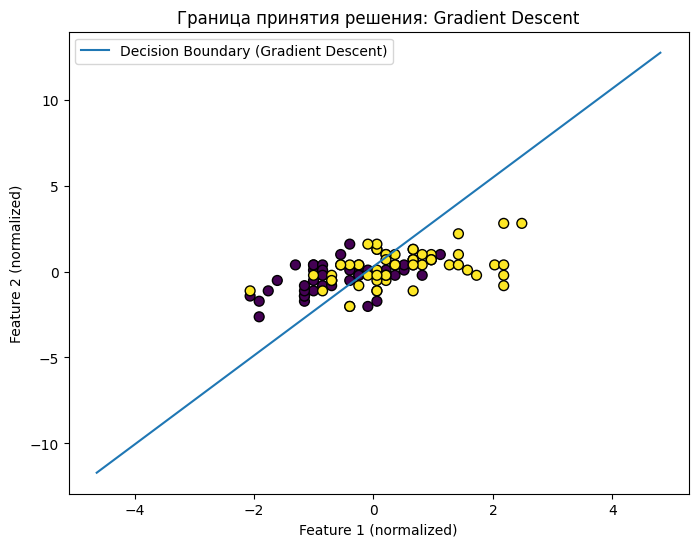

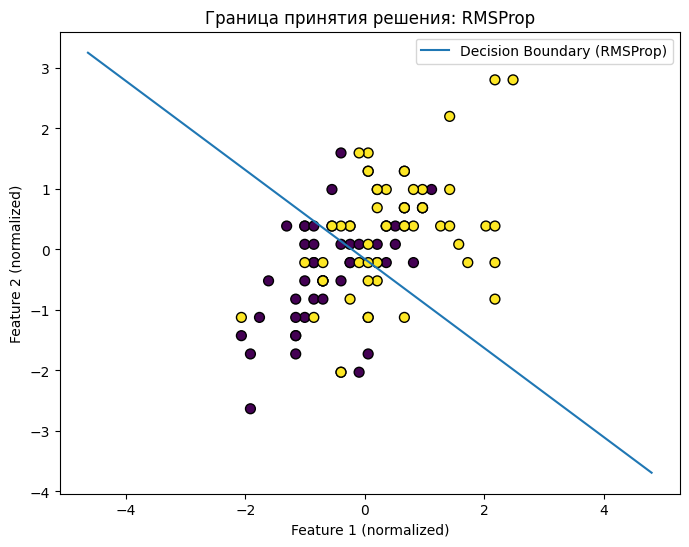

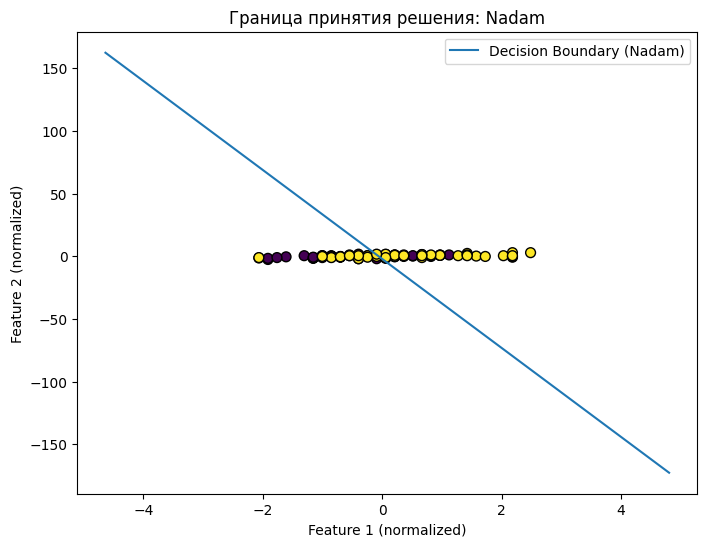

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import time

# Загрузка набора данных "Ирисы"
iris = load_iris()

# Извлекаем признаки (X) и метки классов (y)
X = iris.data
y = iris.target

# Оставляем только два класса: Iris Versicolor (1) и Iris Virginica (2)
X = X[y != 0]
y = y[y != 0]

# Перекодируем метки классов: 1 -> 0 (Iris Versicolor), 2 -> 1 (Iris Virginica)
y = y - 1

# Нормализация признаков
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Выводим размерность данных
print("Форма X:", X.shape)
print("Форма y:", y.shape)

# Функция для вычисления сигмоидальной функции
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Функция для вычисления потерь
def compute_loss(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    loss = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return loss

# Функция для обучения модели с использованием обычного градиентного спуска
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.zeros(X.shape[1])

    for epoch in range(epochs):
        gradient = np.dot(X.T, (sigmoid(np.dot(X, weights)) - y)) / y.size
        weights -= learning_rate * gradient

    return weights

# Функция для обучения модели с использованием метода RMSProp
def rmsprop(X, y, learning_rate=0.01, epochs=1000, beta=0.9, epsilon=1e-8):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.zeros(X.shape[1])
    cache = np.zeros(X.shape[1])

    for epoch in range(epochs):
        gradient = np.dot(X.T, (sigmoid(np.dot(X, weights)) - y)) / y.size
        cache = beta * cache + (1 - beta) * gradient**2
        weights -= learning_rate * gradient / (np.sqrt(cache) + epsilon)

    return weights

# Функция для обучения модели с использованием метода Nadam
def nadam(X, y, learning_rate=0.001, epochs=1000, beta1=0.9, beta2=0.999, epsilon=1e-8):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.zeros(X.shape[1])
    m = np.zeros(X.shape[1])
    v = np.zeros(X.shape[1])

    for epoch in range(epochs):
        gradient = np.dot(X.T, (sigmoid(np.dot(X, weights)) - y)) / y.size
        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * (gradient**2)

        m_hat = m / (1 - beta1**(epoch + 1))
        v_hat = v / (1 - beta2**(epoch + 1))

        weights -= learning_rate * (beta1 * m_hat + ((1 - beta1) * gradient / (1 - beta1**(epoch + 1)))) / (np.sqrt(v_hat) + epsilon)

    return weights

# Функция для прогнозирования меток классов на основе обученных весов
def predict(X, weights):
    X = np.insert(X, 0, 1, axis=1)
    return sigmoid(np.dot(X, weights)) >= 0.5

# Функция для вычисления точности модели
def calculate_accuracy(X, y, weights):
    predictions = predict(X, weights)
    accuracy = np.mean(predictions == y)
    return accuracy

# Измерение времени и точности для Gradient Descent
start_time = time.time()
weights_gd = gradient_descent(X, y, learning_rate=0.01, epochs=1000)
accuracy_gd = calculate_accuracy(X, y, weights_gd)
time_gd = time.time() - start_time
print(f"Точность (Gradient Descent): {accuracy_gd * 100:.2f}%, Время работы: {time_gd:.4f} секунд")

# Измерение времени и точности для RMSProp
start_time = time.time()
weights_rmsprop = rmsprop(X, y, learning_rate=0.01, epochs=1000)
accuracy_rmsprop = calculate_accuracy(X, y, weights_rmsprop)
time_rmsprop = time.time() - start_time
print(f"Точность (RMSProp): {accuracy_rmsprop * 100:.2f}%, Время работы: {time_rmsprop:.4f} секунд")

# Измерение времени и точности для Nadam
start_time = time.time()
weights_nadam = nadam(X, y, learning_rate=0.001, epochs=1000)
accuracy_nadam = calculate_accuracy(X, y, weights_nadam)
time_nadam = time.time() - start_time
print(f"Точность (Nadam): {accuracy_nadam * 100:.2f}%, Время работы: {time_nadam:.4f} секунд")

# Оформление результатов в таблицу
results = pd.DataFrame({
    'Метод': ['Gradient Descent', 'RMSProp', 'Nadam'],
    'Точность (%)': [accuracy_gd * 100, accuracy_rmsprop * 100, accuracy_nadam * 100],
    'Время работы (с)': [time_gd, time_rmsprop, time_nadam]
})

# Выводим таблицу
print(results)

# Визуализация границы принятия решения для каждого метода
def plot_decision_boundary(weights, method_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)

    # Определяем границу разделения классов, используя веса модели
    x_values = [np.min(X[:, 1] - 2), np.max(X[:, 1] + 2)]
    y_values = -(weights[0] + np.dot(weights[1], x_values)) / weights[2]

    plt.plot(x_values, y_values, label=f'Decision Boundary ({method_name})')
    plt.xlabel('Feature 1 (normalized)')
    plt.ylabel('Feature 2 (normalized)')
    plt.title(f'Граница принятия решения: {method_name}')
    plt.legend()
    plt.show()

# Построение графиков для каждого метода
plot_decision_boundary(weights_gd, "Gradient Descent")
plot_decision_boundary(weights_rmsprop, "RMSProp")
plot_decision_boundary(weights_nadam, "Nadam")




